In [530]:
clear

local year 98
/* local year 1400 */

local RU R

local dir "~/Documents/Data/HEIS/`year'/csv"
/* local dir "~/Documents/Data/HEIS/100/csv" */

local dir_sum "~/Documents/Data/HEIS/DataSummary/13`year'"
/* local dir_sum "~/Documents/Data/HEIS/DataSummary/`year'" */

```TODO```
- Rahn
- tarigh tahiye
- cat

# Load HH monthly expenditure

## Load Data from HEIS tables

In [531]:
/* clear
local path "`dir'/R/R`year'P3S01.csv"
import delimited "`path'", delimiter(",") clear //
des

list */

In [532]:
tempfile monthly_tempfile
save `monthly_tempfile', replace empty



(note: dataset contains 0 observations)
(note: file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000q not
>  found)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000q saved


In [533]:
local tables 01 02
foreach table of local tables {
    local path "`dir'/`RU'/`RU'`year'P3S`table'.csv"
    import delimited "`path'", delimiter(",") clear //

    destring dycol06 dycol02, replace
    // keep only if HH has paid for it.
    drop if dycol02 != 1

    rename dycol06 value
    rename dycol01 good_code
    
    keep address good_code value

    append using `monthly_tempfile'
    save `monthly_tempfile', replace
}


local tables 03 05 06 07 08 09 11 12
foreach table of local tables {
    local path "`dir'/`RU'/`RU'`year'P3S`table'.csv"
    import delimited "`path'", delimiter(",") clear //
    destring dycol03 dycol02, replace

    // keep only if HH has paid for it.
    drop if dycol02 != 1

    rename dycol03 value
    rename dycol01 good_code
    keep address good_code value

    append using `monthly_tempfile'
    save `monthly_tempfile', replace
}


disp "## table 04 ###"
local tables 04
foreach table of local tables {
    local path "`dir'/`RU'/`RU'`year'P3S`table'.csv"
    import delimited "`path'", delimiter(",") clear //
    
    // keep only if HH has paid for it.
    destring dycol03, replace
    destring dycol02 dycol04, replace
    
    drop if dycol03 != 1

    rename dycol04 value
    rename dycol01 good_code
    
    // Rahn value adjustment (3 to 100)
    replace value = value + (dycol02 / 100 * 3) if !missing(dycol02)

    keep address good_code value

    append using `monthly_tempfile'
    save `monthly_tempfile', replace
}

replace value = int(value)



(7 vars, 516,811 obs)
(21,243 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000q saved
(7 vars, 4,175 obs)
(31 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000q saved


(4 vars, 22,378 obs)
(91 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000q saved
(4 vars, 87,170 obs)
(1,267 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000q saved
(4 vars, 30,600 obs)
(4,061 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000q saved
(4 vars, 35,450 obs)
(116 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000q saved
(4 vars, 28,627 obs)
(18 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000q saved
(4 vars, 10,839 obs)
(67 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000q saved
(

In [534]:
save `monthly_tempfile', replace

/* save "`RU'_`year'_monthly_HH_exp.dta", replace */

file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000q saved


In [535]:
des


Contains data from /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.000
> 00q
  obs:       838,185                          
 vars:             3                          23 Oct 2023 10:58
 size:    13,410,960                          
--------------------------------------------------------------------------------


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
address         double  %10.0g                Address
good_code       long    %12.0g                DYCOL01
value           long    %12.0g                DYCOL04
--------------------------------------------------------------------------------
Sorted by: 


---
## Add VAT-Rate

In [536]:
clear

import excel "../HEIS_Month_VAT_rate.xlsx", firstrow

/* gen good_code = string(cat) + string(sub_cat) */
destring good_code, replace

keep vat_rate good_code
merge 1:m good_code using `monthly_tempfile'
/* merge 1:m good_code using "`RU'_`year'_monthly_HH_exp.dta" */




good_code already numeric; no replace



    Result                           # of obs.
    -----------------------------------------
    not matched                            28
        from master                        28  (_merge==1)
        from using                          0  (_merge==2)

    matched                           838,185  (_merge==3)
    -----------------------------------------


In [537]:
/* list vat_rate good_code if _merge == 2 */

drop if _merge == 1
drop _merge


(28 observations deleted)



In [538]:
tab vat_rate [w=value]

(frequency weights assumed)

   vat_rate |      Freq.     Percent        Cum.
------------+-----------------------------------
         -1 | 3860661000        1.47        1.47
          0 | 1.3109e+11       49.92       51.39
          9 | 1.0318e+11       39.29       90.68
         15 | 7546191249        2.87       93.56
         16 | 1278786500        0.49       94.05
         25 | 3034563750        1.16       95.20
         30 | 8311207000        3.17       98.37
         40 | 2119705500        0.81       99.17
        100 | 2171355000        0.83      100.00
------------+-----------------------------------
      Total | 2.6259e+11      100.00


## Export goods weight

In [539]:
/* preserve 
egen total_good_exp = sum(value), by(good_code)
keep total_good_exp good_code
duplicates drop
egen weight_sum = sum(total_good_exp)
gen weight = total_good_exp / weight_sum * 100

keep good_code weight
export excel using "monthly_good_weight_`year'_`RU'.xlsx", replace firstrow(variables)
/* gsort -avg_good_exp */
/* tab good_code [w=int(avg_good_exp)], sort */
restore */

---
## Add good Category

In [540]:
/* drop good_cat */

gen good_cat = ""
replace good_cat = "0" + substr(string(good_code), 1, 3) if length(string(good_code)) == 5
replace good_cat = substr(string(good_code), 1, 4) if length(string(good_code)) == 6


(838,185 missing values generated)

variable good_cat was str1 now str4
(759,921 real changes made)

(78,264 real changes made)


In [541]:
/* drop category */

gen category = 0
replace category = 1  if substr(good_cat, 1, 2) == "01" | substr(good_cat, 1, 3) == "021"
/* replace category = 2  if substr(good_cat, 1, 2) == "02" */

replace category = 3  if substr(good_cat, 1, 2) == "03"
replace category = 4  if substr(good_cat, 1, 2) == "04"
replace category = 5  if substr(good_cat, 1, 2) == "05"
replace category = 6  if substr(good_cat, 1, 2) == "06"
replace category = 7  if substr(good_cat, 1, 2) == "07"
replace category = 8  if substr(good_cat, 1, 2) == "08"
replace category = 9  if substr(good_cat, 1, 2) == "09"
replace category = 11 if substr(good_cat, 1, 2) == "11"
// 12 is others => zode zero


/* label define good_cat_label_fa ///
    0 "سایر" ///
    1 "خوراکی و نوشیدنی" ///
    3 "پوشاک" ///
    4 "مسکن، آب و فاضلاب و روشنایی" ///
    5 "مبلمان و لوازم خانگی و نگهداری" ///
    6 "بهداشتی و درمانی" ///
    7 "حمل و نقل" ///
    8 "ارتباطات، تلفن و موبایل" ///
    9 "سرگرمی و تجهیزات سمعی-بصری و یارانه" ///
    10 "آموزش" ///
    11 "غذای آماده، هتل و رستوران" 
    12 "بیمه" */

label define good_cat_label_en ///
    0 "others" ///
    1 "foods & drinks" ///
    3 "clothes" ///
    4 "home, water, light" ///
    5 "sofa, hose exp" ///
    6 "Healthcare" ///
    7 "tranportation" ///
    8 "connections, phone & mobile" ///
    9 "entertainment, multimedia, computer" ///
    10 "learning" ///
    11 "hotel, restrunt" ///
    12 "Insurance" 

label values category good_cat_label_en



(495,573 real changes made)

(22,287 real changes made)

(50,765 real changes made)

(85,903 real changes made)

(26,539 real changes made)

(35,334 real changes made)

(28,609 real changes made)

(10,772 real changes made)

(11,049 real changes made)




In [542]:
tab category [w = value]

(frequency weights assumed)

                           category |      Freq.     Percent        Cum.
------------------------------------+-----------------------------------
                             others |15704755448        5.98        5.98
                     foods & drinks | 1.3992e+11       53.28       59.26
                            clothes |18604706000        7.09       66.35
                 home, water, light |21558480557        8.21       74.56
                     sofa, hose exp |12687964760        4.83       79.39
                         Healthcare |20218966100        7.70       87.09
                      tranportation |20771951000        7.91       95.00
        connections, phone & mobile | 7910924771        3.01       98.01
entertainment, multimedia, computer | 2182065000        0.83       98.84
                    hotel, restrunt | 3034720000        1.16      100.00
------------------------------------+-----------------------------------
                      

## Aggrigate expenditure

In [543]:
drop if vat_rate == -1

(635 observations deleted)


In [544]:
/* drop tv* */

egen monthly_tv_exm = sum(value * (vat_rate == 0)), by(address)
egen monthly_tv_9 = sum(value * (vat_rate == 9)), by(address)
egen monthly_tv_other = sum(value * ((vat_rate != 9) & (vat_rate != 0))), by(address)

In [545]:
egen monthly_cat_exm_ = sum(value * (vat_rate == 0)), by(address category)
egen monthly_cat_9_ = sum(value * (vat_rate == 9)), by(address category)
egen monthly_cat_other_ = sum(value * ((vat_rate != 9) & (vat_rate != 0))), by(address category)

In [546]:
keep address category monthly_tv* monthly_cat*
duplicates drop

reshape wide monthly_cat*, i(address) j(category)




Duplicates in terms of all variables

(705,323 observations deleted)

(note: j = 0 1 3 4 5 6 7 8 9 11)

Data                               long   ->   wide
-----------------------------------------------------------------------------
Number of obs.                   132227   ->   18402
Number of variables                   8   ->      34
j variable (10 values)         category   ->   (dropped)
xij variables:
                       monthly_cat_exm_   ->   monthly_cat_exm_0 monthly_cat_exm
> _1 ... monthly_cat_exm_11
                         monthly_cat_9_   ->   monthly_cat_9_0 monthly_cat_9_1 .
> .. monthly_cat_9_11
                     monthly_cat_other_   ->   monthly_cat_other_0 monthly_cat_o
> ther_1 ... monthly_cat_other_11
-----------------------------------------------------------------------------


In [547]:
des monthly_cat_9_*


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
monthly_cat_9_0 float   %9.0g                 0 monthly_cat_9_
monthly_cat_9_1 float   %9.0g                 1 monthly_cat_9_
monthly_cat_9_3 float   %9.0g                 3 monthly_cat_9_
monthly_cat_9_4 float   %9.0g                 4 monthly_cat_9_
monthly_cat_9_5 float   %9.0g                 5 monthly_cat_9_
monthly_cat_9_6 float   %9.0g                 6 monthly_cat_9_
monthly_cat_9_7 float   %9.0g                 7 monthly_cat_9_
monthly_cat_9_8 float   %9.0g                 8 monthly_cat_9_
monthly_cat_9_9 float   %9.0g                 9 monthly_cat_9_
monthly_ca~9_11 float   %9.0g                 11 monthly_cat_9_


In [548]:
save `monthly_tempfile', replace
/* save "monthly_exp_`RU'_`year'.dta", replace */
/* save "`RU'_`year'_monthly_HH_exp_by_vat.dta", replace */

file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000q saved


---
# Load HH yearly expenditure

## Load Data from HEIS

In [549]:
clear
tempfile yearly_tempfile
save `yearly_tempfile', replace empty




(note: dataset contains 0 observations)
(note: file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000r not
>  found)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000r saved


In [550]:
local tables 13
foreach table of local tables {
    local path "`dir'/`RU'/`RU'`year'P3S`table'.csv"
    import delimited "`path'", delimiter(",") clear //

    rename dycol05 value
    rename dycol01 good_code

    // keep only if HH has paid for it.
    destring dycol04 value good_code dycol06, replace force
    drop if dycol04 != 1

    /* drop if (dycol06 > 0 && !missing(dycol06)) */
    
    keep address good_code value

    append using `yearly_tempfile'
    save `yearly_tempfile', replace
}

replace value = int(value)



(7 vars, 197,127 obs)
dycol04 has all characters numeric; replaced as byte
(575 missing values generated)
value has all characters numeric; replaced as double
(544 missing values generated)
good_code already numeric; no replace
dycol06 has all characters numeric; replaced as long
(194745 missing values generated)
(23,120 observations deleted)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000r saved


In [551]:
save `yearly_tempfile', replace

file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000r saved


---
## Add VAT-rate 

In [552]:
clear

import excel "../HEIS_Yearly_VAT_rate.xlsx", firstrow

/* gen good_code = string(cat) + string(sub_cat) */
destring good_code, replace

keep vat_rate good_code
merge 1:m good_code using `yearly_tempfile'
/* merge 1:m good_code using "`RU'_`year'_monthly_HH_exp.dta" */




good_code already numeric; no replace



    Result                           # of obs.
    -----------------------------------------
    not matched                            14
        from master                        14  (_merge==1)
        from using                          0  (_merge==2)

    matched                           174,007  (_merge==3)
    -----------------------------------------


In [553]:
/* list vat_rate good_code if _merge == 1 */

drop if _merge == 1
drop _merge


(14 observations deleted)



In [554]:
tab vat_rate [w=value]

(frequency weights assumed)

   vat_rate |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 | 3.5742e+11       43.49       43.49
          9 | 3.2185e+11       39.17       82.66
        100 | 1.4250e+11       17.34      100.00
------------+-----------------------------------
      Total | 8.2177e+11      100.00


## Export goods weight

In [555]:
preserve 
egen total_good_exp = sum(value), by(good_code)
keep total_good_exp good_code
duplicates drop
egen weight_sum = sum(total_good_exp)
gen weight = total_good_exp / weight_sum * 100

keep good_code weight
export excel using "yearly_good_weight_`year'_`RU'.xlsx", replace
/* gsort -avg_good_exp */
/* tab good_code [w=int(avg_good_exp)], sort */
restore


already preserved


r(621);
r(621);


## Add good Category

In [556]:
/* drop good_cat */

gen good_cat = ""
replace good_cat = "0" + substr(string(good_code), 1, 3) if length(string(good_code)) == 5
replace good_cat = substr(string(good_code), 1, 4) if length(string(good_code)) == 6


(174,007 missing values generated)



variable good_cat was str1 now str4
(73,725 real changes made)

(100,282 real changes made)


In [557]:
/* drop category */

gen category = 0
/* replace category = 1  if substr(good_cat, 1, 3) == "01" */
replace category = 3  if substr(good_cat, 1, 2) == "03"
replace category = 4  if substr(good_cat, 1, 2) == "04"
replace category = 5  if substr(good_cat, 1, 2) == "05"
replace category = 6  if substr(good_cat, 1, 2) == "06"
replace category = 7  if substr(good_cat, 1, 2) == "07"
replace category = 8  if substr(good_cat, 1, 2) == "08"
replace category = 9  if substr(good_cat, 1, 2) == "09"
replace category = 10 if substr(good_cat, 1, 2) == "10"
// to 11
// 12 is others => code zero
replace category = 12 if substr(good_cat, 1, 3) == "125"
// 127 => others



/* label define good_cat_label ///
    0 "سایر" ///
    1 "خوراکی" ///
    3 "پوشاک" ///
    4 "مسکن، آب و فاضلاب و روشنایی" ///
    5 "مبلمان و لوازم خانگی و نگهداری" ///
    6 "بهداشتی و درمانی" ///
    7 "حمل و نقل" ///
    11 "غذای آماده، هتل و رستوران"
    10 "آموزش" ///
    11 "بیمه" */

label define good_cat_label_en ///
    0 "others" ///
    1 "foods & drinks" ///
    3 "clothes" ///
    4 "home, water, light" ///
    5 "sofa, hose exp" ///
    6 "Healthcare" ///
    7 "tranportation" ///
    8 "connections, phone & mobile" ///
    9 "entertainment, multimedia, computer" ///
    10 "learning" ///
    11 "hotel, restrunt" ///
    12 "Insurance" 

label values category good_cat_label_en



(88 real changes made)

(10,949 real changes made)

(7,818 real changes made)



(3,843 real changes made)

(29,148 real changes made)

(1,357 real changes made)

(20,522 real changes made)

(9,041 real changes made)

(24,778 real changes made)




In [558]:
tab category [w = value]

(frequency weights assumed)

                           category |      Freq.     Percent        Cum.
------------------------------------+-----------------------------------
                             others | 1.5783e+11       19.21       19.21
                            clothes |  789500000        0.10       19.30
                 home, water, light |46277233000        5.63       24.93
                     sofa, hose exp |97850140000       11.91       36.84
                         Healthcare |55892714000        6.80       43.64
                      tranportation | 2.2139e+11       26.94       70.58
        connections, phone & mobile |15654055000        1.90       72.49
entertainment, multimedia, computer |41747620800        5.08       77.57
                           learning |26452153000        3.22       80.79
                          Insurance | 1.5789e+11       19.21      100.00
------------------------------------+-----------------------------------
                      

## Aggrigate expenditure

In [559]:
/* tv = total_value */
/* drop tv* */

egen yearly_tv_exm = sum(value * (vat_rate == 0)), by(address)
egen yearly_tv_9 = sum(value * (vat_rate == 9)), by(address)
egen yearly_tv_other = sum(value * ((vat_rate != 9) & (vat_rate != 0) & (vat_rate != -1))), by(address)

In [560]:
egen yearly_cat_exm_ = sum(value * (vat_rate == 0)), by(address category)
egen yearly_cat_9_ = sum(value * (vat_rate == 9)), by(address category)
egen yearly_cat_other_ = sum(value * ((vat_rate != 9) & (vat_rate != 0) & (vat_rate != -1))), by(address category)

In [561]:
keep address category yearly_tv* yearly_cat*
duplicates drop

reshape wide yearly_cat*, i(address) j(category)




Duplicates in terms of all variables

(103,804 observations deleted)

(note: j = 0 3 4 5 6 7 8 9 10 12)

Data                               long   ->   wide
-----------------------------------------------------------------------------
Number of obs.                    70203   ->   18122
Number of variables                   8   ->      34
j variable (10 values)         category   ->   (dropped)
xij variables:
                        yearly_cat_exm_   ->   yearly_cat_exm_0 yearly_cat_exm_3
>  ... yearly_cat_exm_12
                          yearly_cat_9_   ->   yearly_cat_9_0 yearly_cat_9_3 ...
>  yearly_cat_9_12
                      yearly_cat_other_   ->   yearly_cat_other_0 yearly_cat_oth
> er_3 ... yearly_cat_other_12
-----------------------------------------------------------------------------


In [562]:
des yearly_cat_9_*


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
yearly_cat_9_0  float   %9.0g                 0 yearly_cat_9_
yearly_cat_9_3  float   %9.0g                 3 yearly_cat_9_
yearly_cat_9_4  float   %9.0g                 4 yearly_cat_9_
yearly_cat_9_5  float   %9.0g                 5 yearly_cat_9_
yearly_cat_9_6  float   %9.0g                 6 yearly_cat_9_
yearly_cat_9_7  float   %9.0g                 7 yearly_cat_9_
yearly_cat_9_8  float   %9.0g                 8 yearly_cat_9_
yearly_cat_9_9  float   %9.0g                 9 yearly_cat_9_
yearly_cat_9_10 float   %9.0g                 10 yearly_cat_9_
yearly_cat_9_12 float   %9.0g                 12 yearly_cat_9_


In [563]:
keep address yearly_tv* yearly_cat*
duplicates drop




Duplicates in terms of all variables

(0 observations are duplicates)


In [564]:
save `yearly_tempfile', replace
/* save "yearly_exp_`RU'_`year'.dta", replace */
/* save "`RU'_`year'_monthly_HH_exp_by_vat.dta", replace */

file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000r saved


---
# Merge yearly and monthly data

In [565]:
clear
use `monthly_tempfile'
merge 1:1 address using `yearly_tempfile'





    Result                           # of obs.
    -----------------------------------------
    not matched                           300
        from master                       290  (_merge==1)
        from using                         10  (_merge==2)

    matched                            18,112  (_merge==3)
    -----------------------------------------


In [566]:
drop _merge
/* des */

In [567]:
foreach var of varlist _all {
    replace `var' = 0 if missing(`var')
}

/* local vars monthly_tv_exm monthly_tv_9 monthly_tv_other
foreach var of local vars {
    replace `var' = 0 if missing(`var')
}

local vars yearly_tv_exm yearly_tv_9 yearly_tv_other
foreach var of local vars {
    replace `var' = 0 if missing(`var')
} */




(0 real changes made)
(1,453 real changes made)
(1,453 real changes made)
(1,453 real changes made)
(42 real changes made)
(42 real changes made)
(42 real changes made)
(10,733 real changes made)
(10,733 real changes made)
(10,733 real changes made)
(1,007 real changes made)
(1,007 real changes made)
(1,007 real changes made)
(1,241 real changes made)
(1,241 real changes made)
(1,241 real changes made)
(6,536 real changes made)
(6,536 real changes made)
(6,536 real changes made)
(1,665 real changes made)
(1,665 real changes made)
(1,665 real changes made)
(883 real changes made)
(883 real changes made)
(883 real changes made)
(14,290 real changes made)
(14,290 real changes made)
(14,290 real changes made)
(14,043 real changes made)
(14,043 real changes made)
(14,043 real changes made)
(10 real changes made)
(10 real changes made)
(10 real changes made)
(637 real changes made)
(637 real changes made)
(637 real changes made)
(18,329 real changes made)
(18,329 real changes made)
(18,329 

In [568]:
/* drop simple_tv* */
gen simple_tv_exm = 12 * monthly_tv_exm + yearly_tv_exm
gen simple_tv_9 = 12 * monthly_tv_9 + yearly_tv_9
gen simple_tv_other = 12 * monthly_tv_other + yearly_tv_other

gen monthly_exm_ratio = monthly_tv_exm / (monthly_tv_exm + monthly_tv_9 + monthly_tv_other)
gen simple_exm_ratio = simple_tv_exm / (simple_tv_exm + simple_tv_9 + simple_tv_other)





(10 missing values generated)



### Exempt Ratio

In [569]:
codebook simple_exm_ratio


--------------------------------------------------------------------------------
simple_exm_ratio                                                     (unlabeled)
--------------------------------------------------------------------------------

                  type:  numeric (float)



                 range:  [0,1]                        units:  1.000e-10
         unique values:  18,364                   missing .:  0/18,412

                  mean:   .515965
              std. dev:   .149673

           percentiles:        10%       25%       50%       75%       90%
                           .326709   .416741   .515584    .61382   .706363


(bin=42, start=0, width=.02380952)


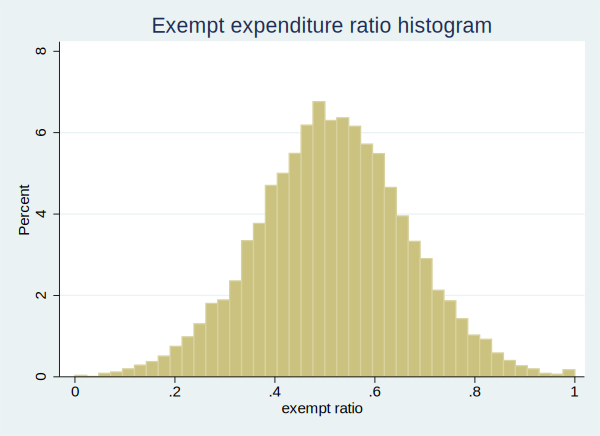

In [570]:
hist simple_exm_ratio, percent ///
    title("Exempt expenditure ratio histogram") ///
    xtitle("exempt ratio")

In [571]:
tempfile expenditure_tempfile
save `expenditure_tempfile', replace
/* save "total_exp_`RU'_`year'.dta", replace */
/* save "`RU'_`year'_monthly_HH_exp_by_vat.dta", replace */



(note: file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000s not
>  found)
file /var/folders/tk/1z6fw8316qs1r4xqyfdq95xr0000gn/T//St07074.00000s saved


---
# Add family characteristics

In [572]:
clear

import excel "`dir_sum'/Sum`RU'`year'.xlsx", firstrow clear //

In [573]:
/* rename ADDRESS address */
/* rename Address address */

foreach v in ADDRESS Address { 
       capture confirm var `v' 

       if _rc == 0  { 
                rename `v' address 
       }
}

In [575]:
destring address, replace

merge 1:1 address using `expenditure_tempfile'
/* merge 1:1 address using "`RU'_`year'_monthly_HH_exp_by_vat.dta" */


address has all characters numeric; replaced as double


    Result                           # of obs.
    -----------------------------------------
    not matched                            18
        from master                        18  (_merge==1)
        from using                          0  (_merge==2)

    matched                            18,412  (_merge==3)
    -----------------------------------------


In [576]:
drop if _merge == 1
drop _merge


(18 observations deleted)



In [577]:
gen calculated_exp = (simple_tv_exm + simple_tv_9 + simple_tv_other)
gen cal_exp_to_SC_exp = calculated_exp / NHazine
gen cal_exp_to_SC_exp_G = calculated_exp / GHazine

gen simple_exm_ratio_SC = simple_tv_9 / NHazineh

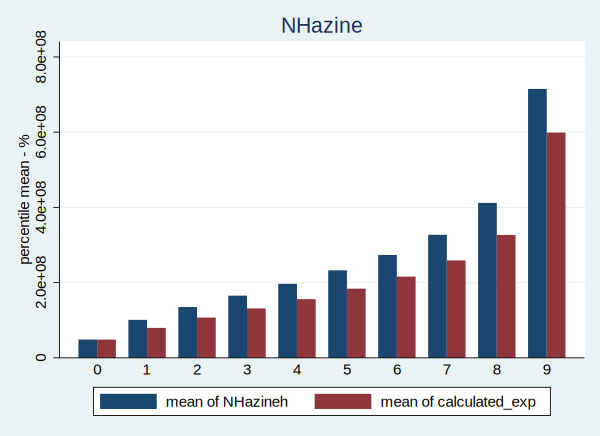

In [578]:
graph bar (mean) NHazine calculated_exp, over(C09New) ///
    title("NHazine") ///
    ytitle("percentile mean - %")

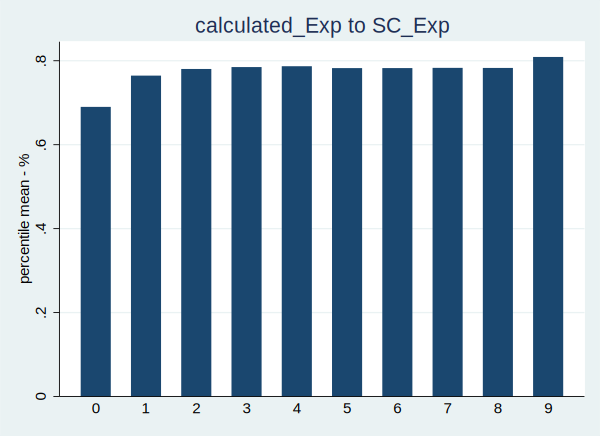

In [579]:
graph bar (mean) cal_exp_to_SC_exp_G, over(C09New) ///
    title("calculated_Exp to SC_Exp") ///
    ytitle("percentile mean - %")

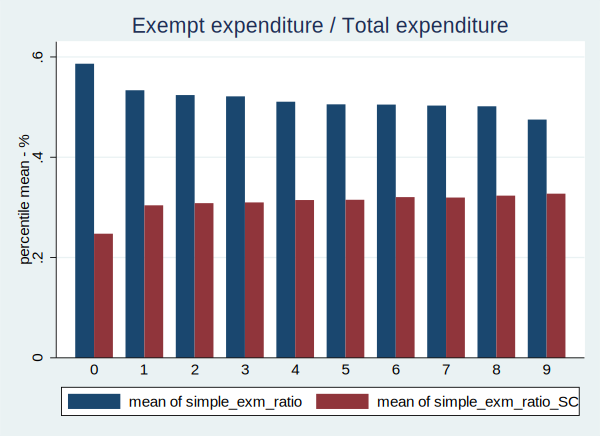

In [580]:
graph bar (mean) simple_exm_ratio simple_exm_ratio_SC, over(C09New) ///
    title("Exempt expenditure / Total expenditure") ///
    ytitle("percentile mean - %")

In [581]:
tabstat simple_exm_ratio, by(C09New)
/* tabstat simple_exm_ratio_SC, by(C09New) */


Summary for variables: simple_exm_ratio
     by categories of: C09New (C09New)

  C09New |      mean
---------+----------
       0 |  .5864897
       1 |  .5336125
       2 |   .523978
       3 |  .5214307
       4 |  .5107266
       5 |  .5055201
       6 |  .5050233
       7 |   .503034
       8 |  .5016081
       9 |  .4751217
---------+----------
   Total |  .5159646
--------------------


In [582]:
tabstat simple_tv_exm [w=weight], s(sum, mean) 
tabstat simple_tv_9 [w=weight], s(sum, mean) 
tabstat simple_tv_other [w=weight], s(sum, mean) 


(analytic weights assumed)

    variable |       sum      mean
-------------+--------------------
simple_tv_~m |  6.29e+14  1.03e+08
----------------------------------

(analytic weights assumed)

    variable |       sum      mean
-------------+--------------------
 simple_tv_9 |  5.09e+14  8.34e+07
----------------------------------

(analytic weights assumed)

    variable |       sum      mean
-------------+--------------------
simple_tv_~r |  1.44e+14  2.37e+07
----------------------------------


In [583]:
/* drop simple_cat_*  */

local cats 0 3 4 5 6 7 8 9
foreach cat of local cats {
    gen simple_cat_exm_`cat'   = 12 * monthly_cat_exm_`cat'     + yearly_cat_exm_`cat'
    gen simple_cat_9_`cat'     = 12 * monthly_cat_9_`cat'       + yearly_cat_9_`cat'
    gen simple_cat_other_`cat' = 12 * monthly_cat_other_`cat'   + yearly_cat_other_`cat'
    gen simple_exm_ratio_cat_`cat' = simple_cat_exm_`cat' / (simple_cat_9_`cat' + simple_cat_exm_`cat' + simple_cat_other_`cat')
}

local cats 1 11
foreach cat of local cats {
    gen simple_cat_exm_`cat'   = 12 * monthly_cat_exm_`cat'  
    gen simple_cat_9_`cat'     = 12 * monthly_cat_9_`cat'    
    gen simple_cat_other_`cat' = 12 * monthly_cat_other_`cat'
    gen simple_exm_ratio_cat_`cat' = simple_cat_exm_`cat' / (simple_cat_9_`cat' + simple_cat_exm_`cat' + simple_cat_other_`cat')
}

local cats 10 12
foreach cat of local cats {
    gen simple_cat_exm_`cat'   = yearly_cat_exm_`cat'
    gen simple_cat_9_`cat'     = yearly_cat_9_`cat'
    gen simple_cat_other_`cat' = yearly_cat_other_`cat'
    gen simple_exm_ratio_cat_`cat' = simple_cat_exm_`cat' / (simple_cat_9_`cat' + simple_cat_exm_`cat' + simple_cat_other_`cat')


}

local cats 0 1 3 4 5 6 7 8 9 10 11 12
foreach cat of local cats {
    gen simple_ratio_SC_9_cat_`cat' = simple_cat_9_`cat' / NHazineh
    gen simple_ratio_SC_exm_cat_`cat' = simple_cat_9_`cat' / NHazineh
    
    gen simple_ratio_9_cat_`cat' = simple_cat_9_`cat' / calculated_exp
    gen simple_ratio_exm_cat_`cat' = simple_cat_9_`cat' / calculated_exp
}



(227 missing values generated)
(10,702 missing values generated)
(791 missing values generated)
(1,024 missing values generated)
(5,832 missing values generated)
(1,642 missing values generated)
(873 missing values generated)
(7,281 missing values generated)


(42 missing values generated)
(14,043 missing values generated)


(12,214 missing values generated)
(6,148 missing values generated)






(bin=42, start=0, width=.02380952)


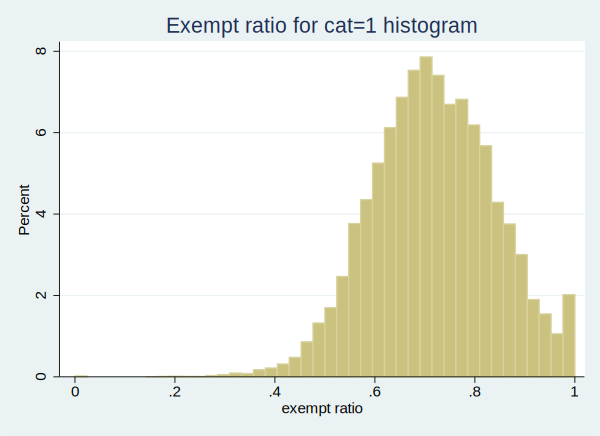

In [584]:
local cat 1
hist simple_exm_ratio_cat_`cat', percent ///
    title("Exempt ratio for cat=`cat' histogram") ///
    xtitle("exempt ratio")

## Exp(Simple) over percentile

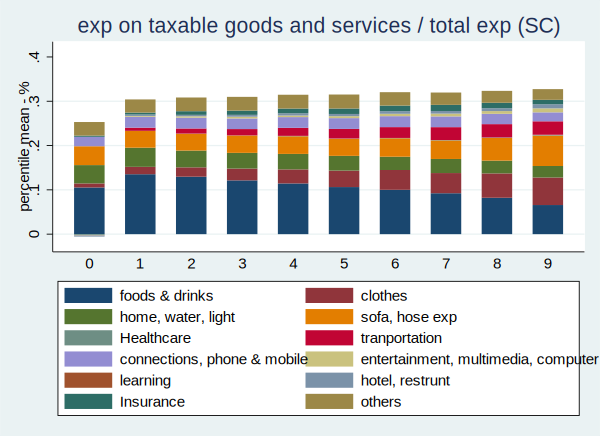

In [585]:
graph bar (mean) simple_ratio_SC_9_cat_1 simple_ratio_SC_9_cat_3 simple_ratio_SC_9_cat_4 simple_ratio_SC_9_cat_5 ///
    simple_ratio_SC_9_cat_6 simple_ratio_SC_9_cat_7 simple_ratio_SC_9_cat_8 simple_ratio_SC_9_cat_9 simple_ratio_SC_9_cat_10 simple_ratio_SC_9_cat_11 simple_ratio_SC_9_cat_12 simple_ratio_SC_9_cat_0 ///
    , over(C09New) stack ///
    title("exp on taxable goods and services / total exp (SC)") ///
    ytitle("percentile mean - %") ///
    legend(order(  ///
        1 "foods & drinks" ///
        2 "clothes" ///
        3 "home, water, light" ///
        4 "sofa, hose exp" ///
        5 "Healthcare" ///
        6 "tranportation" ///
        7 "connections, phone & mobile" ///
        8 "entertainment, multimedia, computer" ///
        9 "learning" ///
        10 "hotel, restrunt" ///
        11 "Insurance" ///
        12 "others" ///
    ))

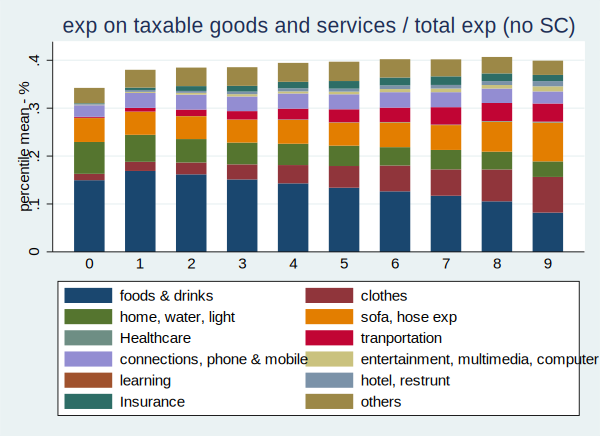

In [586]:
graph bar (mean) simple_ratio_9_cat_1 simple_ratio_9_cat_3 simple_ratio_9_cat_4 simple_ratio_9_cat_5 ///
    simple_ratio_9_cat_6 simple_ratio_9_cat_7 simple_ratio_9_cat_8 simple_ratio_9_cat_9 simple_ratio_9_cat_10 simple_ratio_9_cat_11 simple_ratio_9_cat_12 simple_ratio_9_cat_0 ///
    , over(C09New) stack ///
    title("exp on taxable goods and services / total exp (no SC)") ///
    ytitle("percentile mean - %") ///
    legend(order(  ///
        1 "foods & drinks" ///
        2 "clothes" ///
        3 "home, water, light" ///
        4 "sofa, hose exp" ///
        5 "Healthcare" ///
        6 "tranportation" ///
        7 "connections, phone & mobile" ///
        8 "entertainment, multimedia, computer" ///
        9 "learning" ///
        10 "hotel, restrunt" ///
        11 "Insurance" ///
        12 "others" ///
    ))

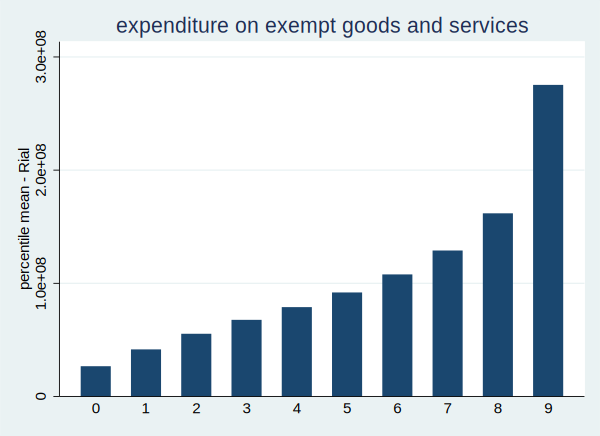

In [587]:
graph bar (mean) simple_tv_exm, over(C09New)  ///
    title("expenditure on exempt goods and services") ///
    ytitle("percentile mean - Rial")

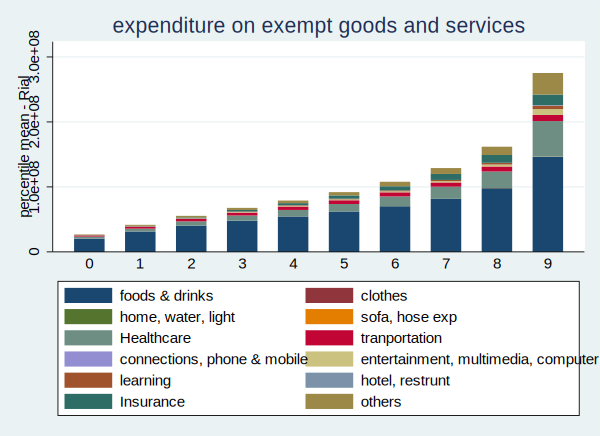

In [588]:
graph bar (mean) simple_cat_exm_1 simple_cat_exm_3 simple_cat_exm_4 simple_cat_exm_5 ///
    simple_cat_exm_6 simple_cat_exm_7 simple_cat_exm_8 simple_cat_exm_9 simple_cat_exm_10 simple_cat_exm_11 simple_cat_exm_12 simple_cat_exm_0 ///
    , over(C09New) stack ///
    title("expenditure on exempt goods and services") ///
    ytitle("percentile mean - Rial") ///
    legend(order(  ///
        1 "foods & drinks" ///
        2 "clothes" ///
        3 "home, water, light" ///
        4 "sofa, hose exp" ///
        5 "Healthcare" ///
        6 "tranportation" ///
        7 "connections, phone & mobile" ///
        8 "entertainment, multimedia, computer" ///
        9 "learning" ///
        10 "hotel, restrunt" ///
        11 "Insurance" ///
        12 "others" ///
    ))

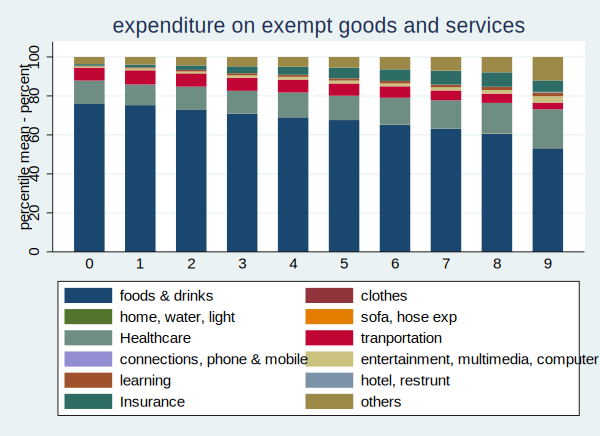

In [589]:
graph bar (mean) simple_cat_exm_1 simple_cat_exm_3 simple_cat_exm_4 simple_cat_exm_5 ///
    simple_cat_exm_6 simple_cat_exm_7 simple_cat_exm_8 simple_cat_exm_9 simple_cat_exm_10 simple_cat_exm_11 simple_cat_exm_12 simple_cat_exm_0 ///
    , over(C09New) stack percentages ///
    title("expenditure on exempt goods and services") ///
    ytitle("percentile mean - percent") ///
    legend(order(  ///
        1 "foods & drinks" ///
        2 "clothes" ///
        3 "home, water, light" ///
        4 "sofa, hose exp" ///
        5 "Healthcare" ///
        6 "tranportation" ///
        7 "connections, phone & mobile" ///
        8 "entertainment, multimedia, computer" ///
        9 "learning" ///
        10 "hotel, restrunt" ///
        11 "Insurance" ///
        12 "others" ///
    ))

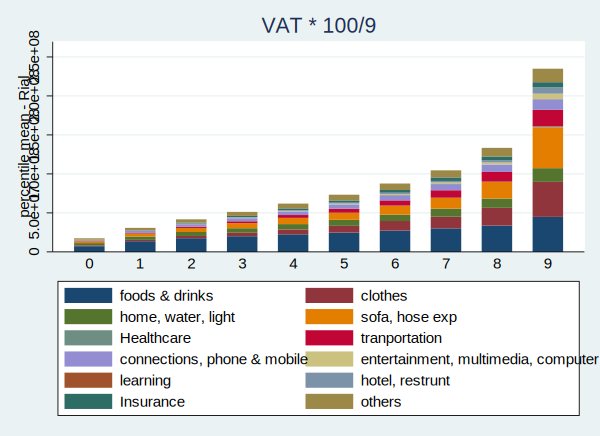

In [590]:
graph bar (mean) simple_cat_9_1 simple_cat_9_3 simple_cat_9_4 simple_cat_9_5 ///
    simple_cat_9_6 simple_cat_9_7 simple_cat_9_8 simple_cat_9_9 simple_cat_9_10 simple_cat_9_11 simple_cat_9_12 simple_cat_9_0 ///
    , over(C09New) stack  ///
    title("VAT * 100/9") ///
    ytitle("percentile mean - Rial") ///
    legend(order(  ///
        1 "foods & drinks" ///
        2 "clothes" ///
        3 "home, water, light" ///
        4 "sofa, hose exp" ///
        5 "Healthcare" ///
        6 "tranportation" ///
        7 "connections, phone & mobile" ///
        8 "entertainment, multimedia, computer" ///
        9 "learning" ///
        10 "hotel, restrunt" ///
        11 "Insurance" ///
        12 "others" ///
    ))

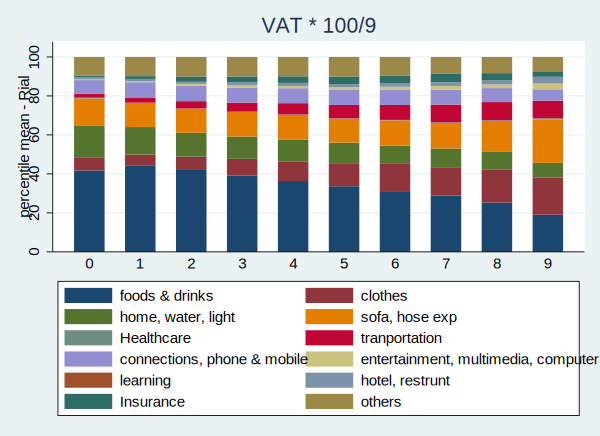

In [591]:
graph bar (mean) simple_cat_9_1 simple_cat_9_3 simple_cat_9_4 simple_cat_9_5 ///
    simple_cat_9_6 simple_cat_9_7 simple_cat_9_8 simple_cat_9_9 simple_cat_9_10 simple_cat_9_11 simple_cat_9_12 simple_cat_9_0 ///
    , over(C09New) stack per ///
    title("VAT * 100/9") ///
    ytitle("percentile mean - Rial") ///
    legend(order(  ///
        1 "foods & drinks" ///
        2 "clothes" ///
        3 "home, water, light" ///
        4 "sofa, hose exp" ///
        5 "Healthcare" ///
        6 "tranportation" ///
        7 "connections, phone & mobile" ///
        8 "entertainment, multimedia, computer" ///
        9 "learning" ///
        10 "hotel, restrunt" ///
        11 "Insurance" ///
        12 "others" ///
    ))

#### Monthly exp

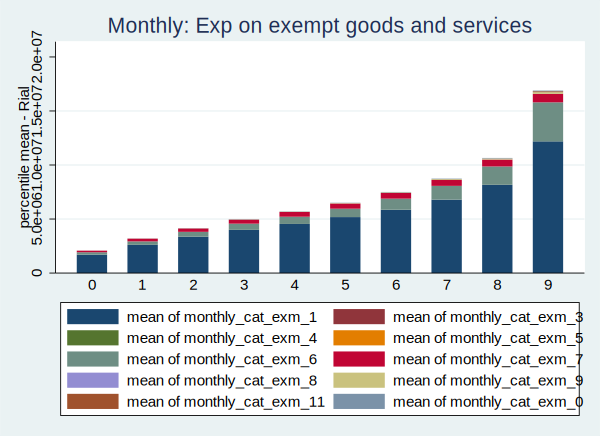

In [592]:
graph bar (mean) monthly_cat_exm_1 monthly_cat_exm_3 monthly_cat_exm_4 monthly_cat_exm_5 ///
    monthly_cat_exm_6 monthly_cat_exm_7 monthly_cat_exm_8 monthly_cat_exm_9 monthly_cat_exm_11 monthly_cat_exm_0 ///
    , over(C09New) stack  ///
    title("Monthly: Exp on exempt goods and services") ///
    ytitle("percentile mean - Rial")


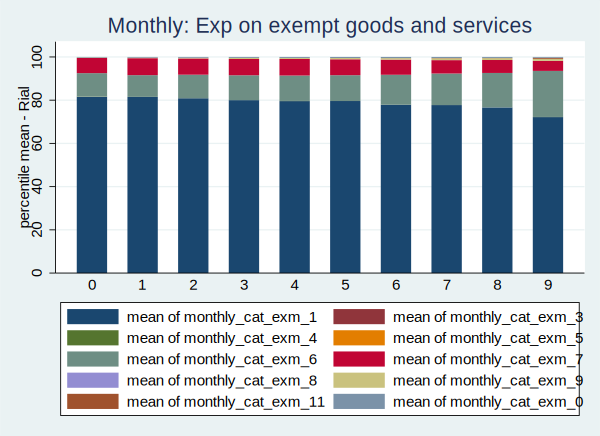

In [593]:
graph bar (mean) monthly_cat_exm_1 monthly_cat_exm_3 monthly_cat_exm_4 monthly_cat_exm_5 ///
    monthly_cat_exm_6 monthly_cat_exm_7 monthly_cat_exm_8 monthly_cat_exm_9 monthly_cat_exm_11 monthly_cat_exm_0 ///
    , over(C09New) stack per ///
    title("Monthly: Exp on exempt goods and services") ///
    ytitle("percentile mean - Rial")


#### Yearly exp

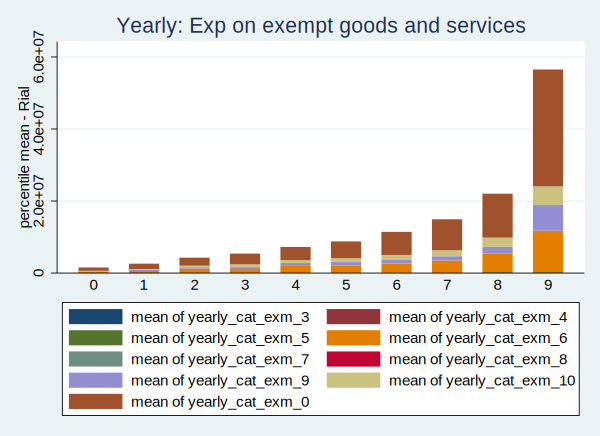

In [594]:
graph bar (mean)  yearly_cat_exm_3 yearly_cat_exm_4 yearly_cat_exm_5 ///
    yearly_cat_exm_6 yearly_cat_exm_7 yearly_cat_exm_8 yearly_cat_exm_9 yearly_cat_exm_10 yearly_cat_exm_0 ///
    , over(C09New) stack  ///
    title("Yearly: Exp on exempt goods and services") ///
    ytitle("percentile mean - Rial")


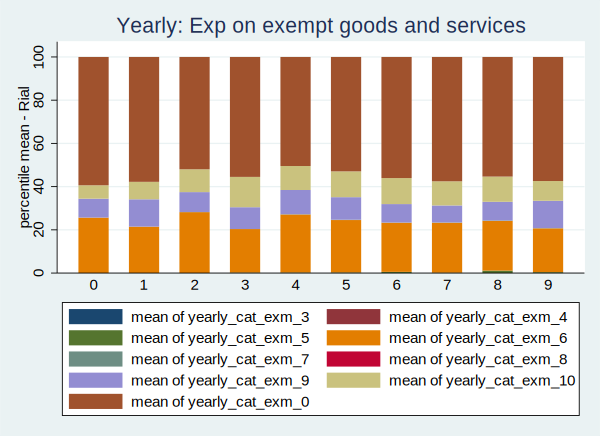

In [595]:
graph bar (mean)  yearly_cat_exm_3 yearly_cat_exm_4 yearly_cat_exm_5 ///
    yearly_cat_exm_6 yearly_cat_exm_7 yearly_cat_exm_8 yearly_cat_exm_9 yearly_cat_exm_10 yearly_cat_exm_0 ///
    , over(C09New) stack per ///
    title("Yearly: Exp on exempt goods and services") ///
    ytitle("percentile mean - Rial")


## Exempt Ratio(Simple) over percentile

In [596]:
/* drop simple_exm_ratio_cat_* my_exp exp_to_SC_exp simple_exm_ratio_SC */

gen simple_exm_ratio_cat_1_ = simple_cat_exm_1 / (simple_tv_exm + simple_tv_9 + simple_tv_other)
gen simple_exm_ratio_cat_6_12_ = (simple_cat_exm_6 + simple_cat_exm_12 ) / (simple_tv_exm + simple_tv_9 + simple_tv_other)
gen simple_exm_ratio_cat_inc_ = (simple_cat_exm_6 + simple_cat_exm_12 + simple_cat_exm_0) / (simple_tv_exm + simple_tv_9 + simple_tv_other)

gen simple_exm_ratio_cat_1_SC = simple_cat_exm_1 / NHazine
gen simple_exm_ratio_cat_6_12_SC = (simple_cat_exm_6 + simple_cat_exm_12) / NHazine
gen simple_exm_ratio_cat_inc_SC = (simple_cat_exm_6 + simple_cat_exm_12 + simple_cat_exm_0) / NHazine

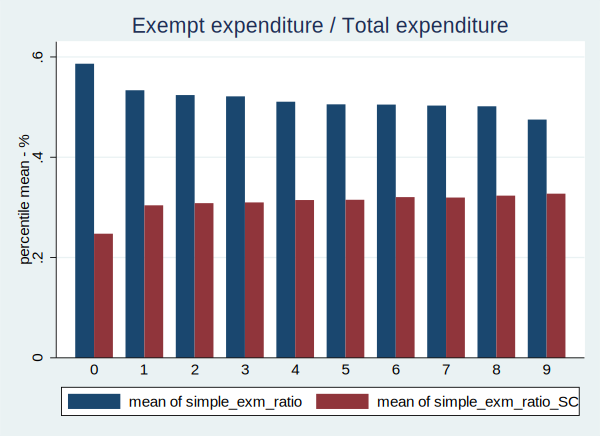

In [597]:
/* graph bar (mean) simple_exm_ratio, over(C09New) ///
    title("Exempt expenditure / Total taxable expenditure") ///
    ytitle("percentile mean - %") */

graph bar (mean) simple_exm_ratio simple_exm_ratio_SC, over(C09New) ///
    title("Exempt expenditure / Total expenditure") ///
    ytitle("percentile mean - %")

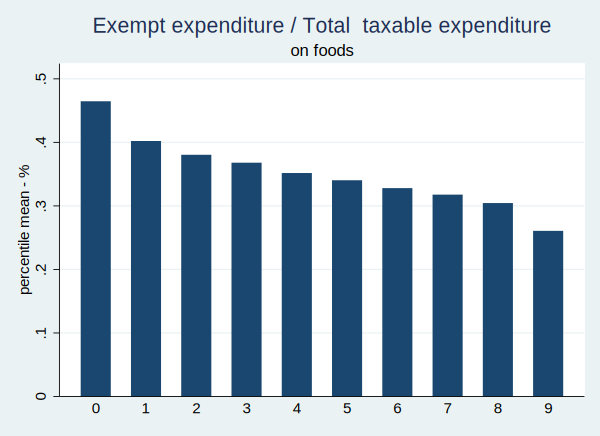

In [598]:
graph bar (mean) simple_exm_ratio_cat_1_ , over(C09New) ///
    title("Exempt expenditure / Total  taxable expenditure") ///
    subtitle("on foods") ///
    ytitle("percentile mean - %")
    
/* graph bar (mean) simple_exm_ratio_cat_1_ simple_exm_ratio_cat_1_SC, over(C09New) ///
    title("Exempt expenditure(Cat1) / Total expenditure") ///
    ytitle("percentile mean - %") */

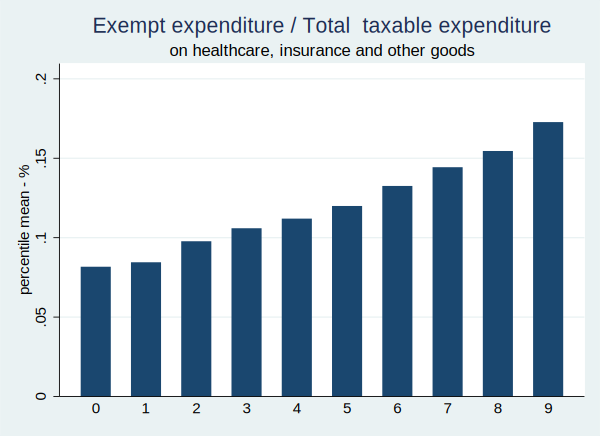

In [599]:
graph bar (mean) simple_exm_ratio_cat_inc_ , over(C09New) ///
    title("Exempt expenditure / Total  taxable expenditure") ///
    subtitle("on healthcare, insurance and other goods") ///
    ytitle("percentile mean - %")


/* graph bar (mean) simple_exm_ratio_cat_inc_ simple_exm_ratio_cat_inc_SC, over(C09New) ///
    title("Exempt expenditure(Cat 6 , 13, 14, 0) / Total expenditure") ///
    ytitle("percentile mean - %") */

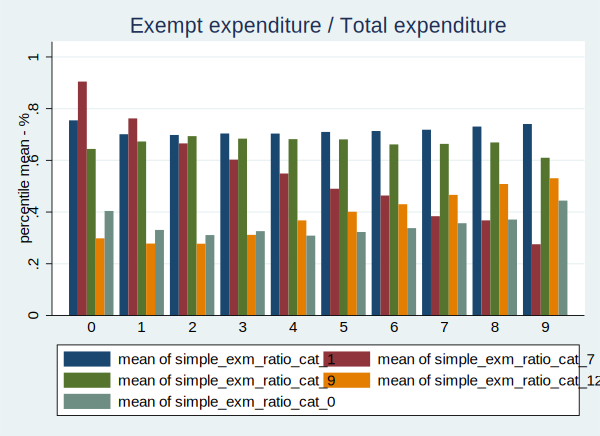

In [600]:
graph bar (mean) simple_exm_ratio_cat_1 simple_exm_ratio_cat_7 simple_exm_ratio_cat_9  simple_exm_ratio_cat_12 simple_exm_ratio_cat_0 ///
    , over(C09New) ///
    title("Exempt expenditure / Total expenditure") ///
    ytitle("percentile mean - %")

In [601]:
/* save `expenditure_tempfile', replace */
save "total_HH_exp_`RU'_`year'.dta", replace
/* save "`RU'_`year'_monthly_HH_exp_by_vat_char.dta", replace */

(note: file total_HH_exp_R_98.dta not found)
file total_HH_exp_R_98.dta saved


---
# Total VAT Calculation

In [602]:
gen paid_vat = simple_tv_9 * 0.09 / 1.09

In [603]:
tabstat paid_vat, format(%20.0gc)
sum paid_vat
/* codebook paid_vat */



    variable |      mean
-------------+----------
    paid_vat | 6,995,644.938910014
------------------------




    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
    paid_vat |     18,412     6995645     7293838          0   1.56e+08


In [604]:
disp "HH average paid vat is " r(mean) " Rial"
disp "total paid VAT is " r(mean) * 26384000 / 10 / 10E9 " Billion Toman"


HH average paid vat is 6995644.9 Rial

total paid VAT is 1845.731 Billion Toman


In [605]:
clear